In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
import sys
sys.path.append('..')
sys.path.append('../..')
sys.path.append('.')
sys.path.append('./scripts')
from simulations_util import *
from util import  apply_splitting_strategy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc
pd.set_option('display.max_columns', None)

In [2]:
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

### Regression

In [3]:
dgp = "linear"
combined_df = pd.DataFrame()
datasets = ["openml_361260", "openml_361622", "openml_361254",  "openml_361259", "openml_361253", "openml_361242"]
for data in datasets:
    ablation_directory = f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_{data}_{dgp}/{data}_{dgp}_vary_sample_size_gradient_boosting_large_depth/varying_heritability_sample_row_n"
    feature_seeds = [1,2,3,4,5]
    error_seed = 1
    sample_seeds = [1,2,3,4,5,6]
    for sample_seed in sample_seeds:
        for feature_seed in feature_seeds:
            df = pd.read_csv(os.path.join(ablation_directory, f"seed_{error_seed}_{feature_seed}_{sample_seed}/results.csv"))
            df["data"] = data
            combined_df = pd.concat([combined_df, df], ignore_index=True)
df = combined_df.groupby(['sample_row_n', 'heritability', 'fi', 'data'])[["auroc_train", "auroc_test"]].mean().reset_index()

In [4]:
methods = [
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus',    
    'MDI',
    'LIME_RF',
    'TreeSHAP_RF',
]
color_map = {
    'LIME_RF': '#71BEB7',
    'TreeSHAP_RF': 'orange',
    'MDI': '#9B5DFF',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'black'
}

data_name = {
    "openml_361260": "Miami Housing",
    "openml_361622": "Cars",
    "openml_361254": "SARCOS",
    "openml_361259": "Puma Robot",
    "openml_361253": "Wave Energy",
    "openml_361242": "Super Conductivitity"
}

methods_name = {
    'LIME_RF': 'LIME',
    'MDI': 'LoTLA',
    'TreeSHAP_RF': 'TreeSHAP',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'LoTLA+',
}

In [5]:
# dataset = "openml_361260"
# heritability_all = df["heritability"].unique()
# marker_size = 7

# # Determine number of rows and columns
# n_cols = 4
# n_rows = 1

# # Create subplots
# fig, axs = plt.subplots(
#     nrows=n_rows,
#     ncols=n_cols,
#     figsize=(8 * n_cols, 6 * n_rows),
#     sharey=False
# )

# # Flatten axes for easier indexing
# axs = axs.flatten()

# # Loop through each dataset
# for idx, heritability in enumerate(heritability_all):
#     ax = axs[idx]
#     subset = df[(df["data"] == dataset) & (df["heritability"] == heritability)]
    
#     # Plot results for each method
#     for method in methods:
#         method_data = subset[subset["fi"] == method]
        
#         if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
#             ax.plot(
#                 method_data["sample_row_n"], method_data['auroc_test'], 
#                 linestyle='solid',marker='o', markersize=marker_size,
#             label=methods_name[method], color=color_map[method],linewidth=3, alpha=0.5
#             )

#         else:
#             ax.plot(
#                 method_data["sample_row_n"], method_data['auroc_test'], linestyle='solid', marker='o',
#             label=methods_name[method], markersize=marker_size, color=color_map[method],linewidth=3
#             )

#     # Set x-axis and labels
#     ax.set_xticks([150, 300, 500])
#     ax.set_xticklabels(["150", "300", "500"], fontsize=15)
#     if idx >= (n_rows - 1) * n_cols:
#         ax.set_xlabel("Sample Size", fontsize=30)
    
#     # Only set y-axis label for the first plot in each row
#     if idx % n_cols == 0:
#         ax.set_ylabel(data_name[dataset]+ "\nAUROC", fontsize=30)
#     else:
#         ax.set_ylabel("")
    
#     # Set subplot title
#     ax.set_title(r"$\bf{PVE}$=" + rf"$\bf{{{heritability}}}$", fontsize=30)
    
#     # Add legend to the last plot in each row
#     if (idx + 1) % n_cols == 0 or idx == len(datasets) - 1:
#         ax.legend(fontsize=22, loc='lower right')

# # Adjust layout and show plot
# plt.tight_layout(rect=[0, 0, 1, 0.94])
# # Add a title at the top
# #plt.savefig("feature_ranking_regression_linear.png")
# plt.suptitle(r"$\bf{Linear}$", fontsize=30)
# plt.show()

/scratch/users/zhongyuan_liang/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/scratch/users/zhongyuan_liang/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/scratch/users/zhongyuan_liang/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


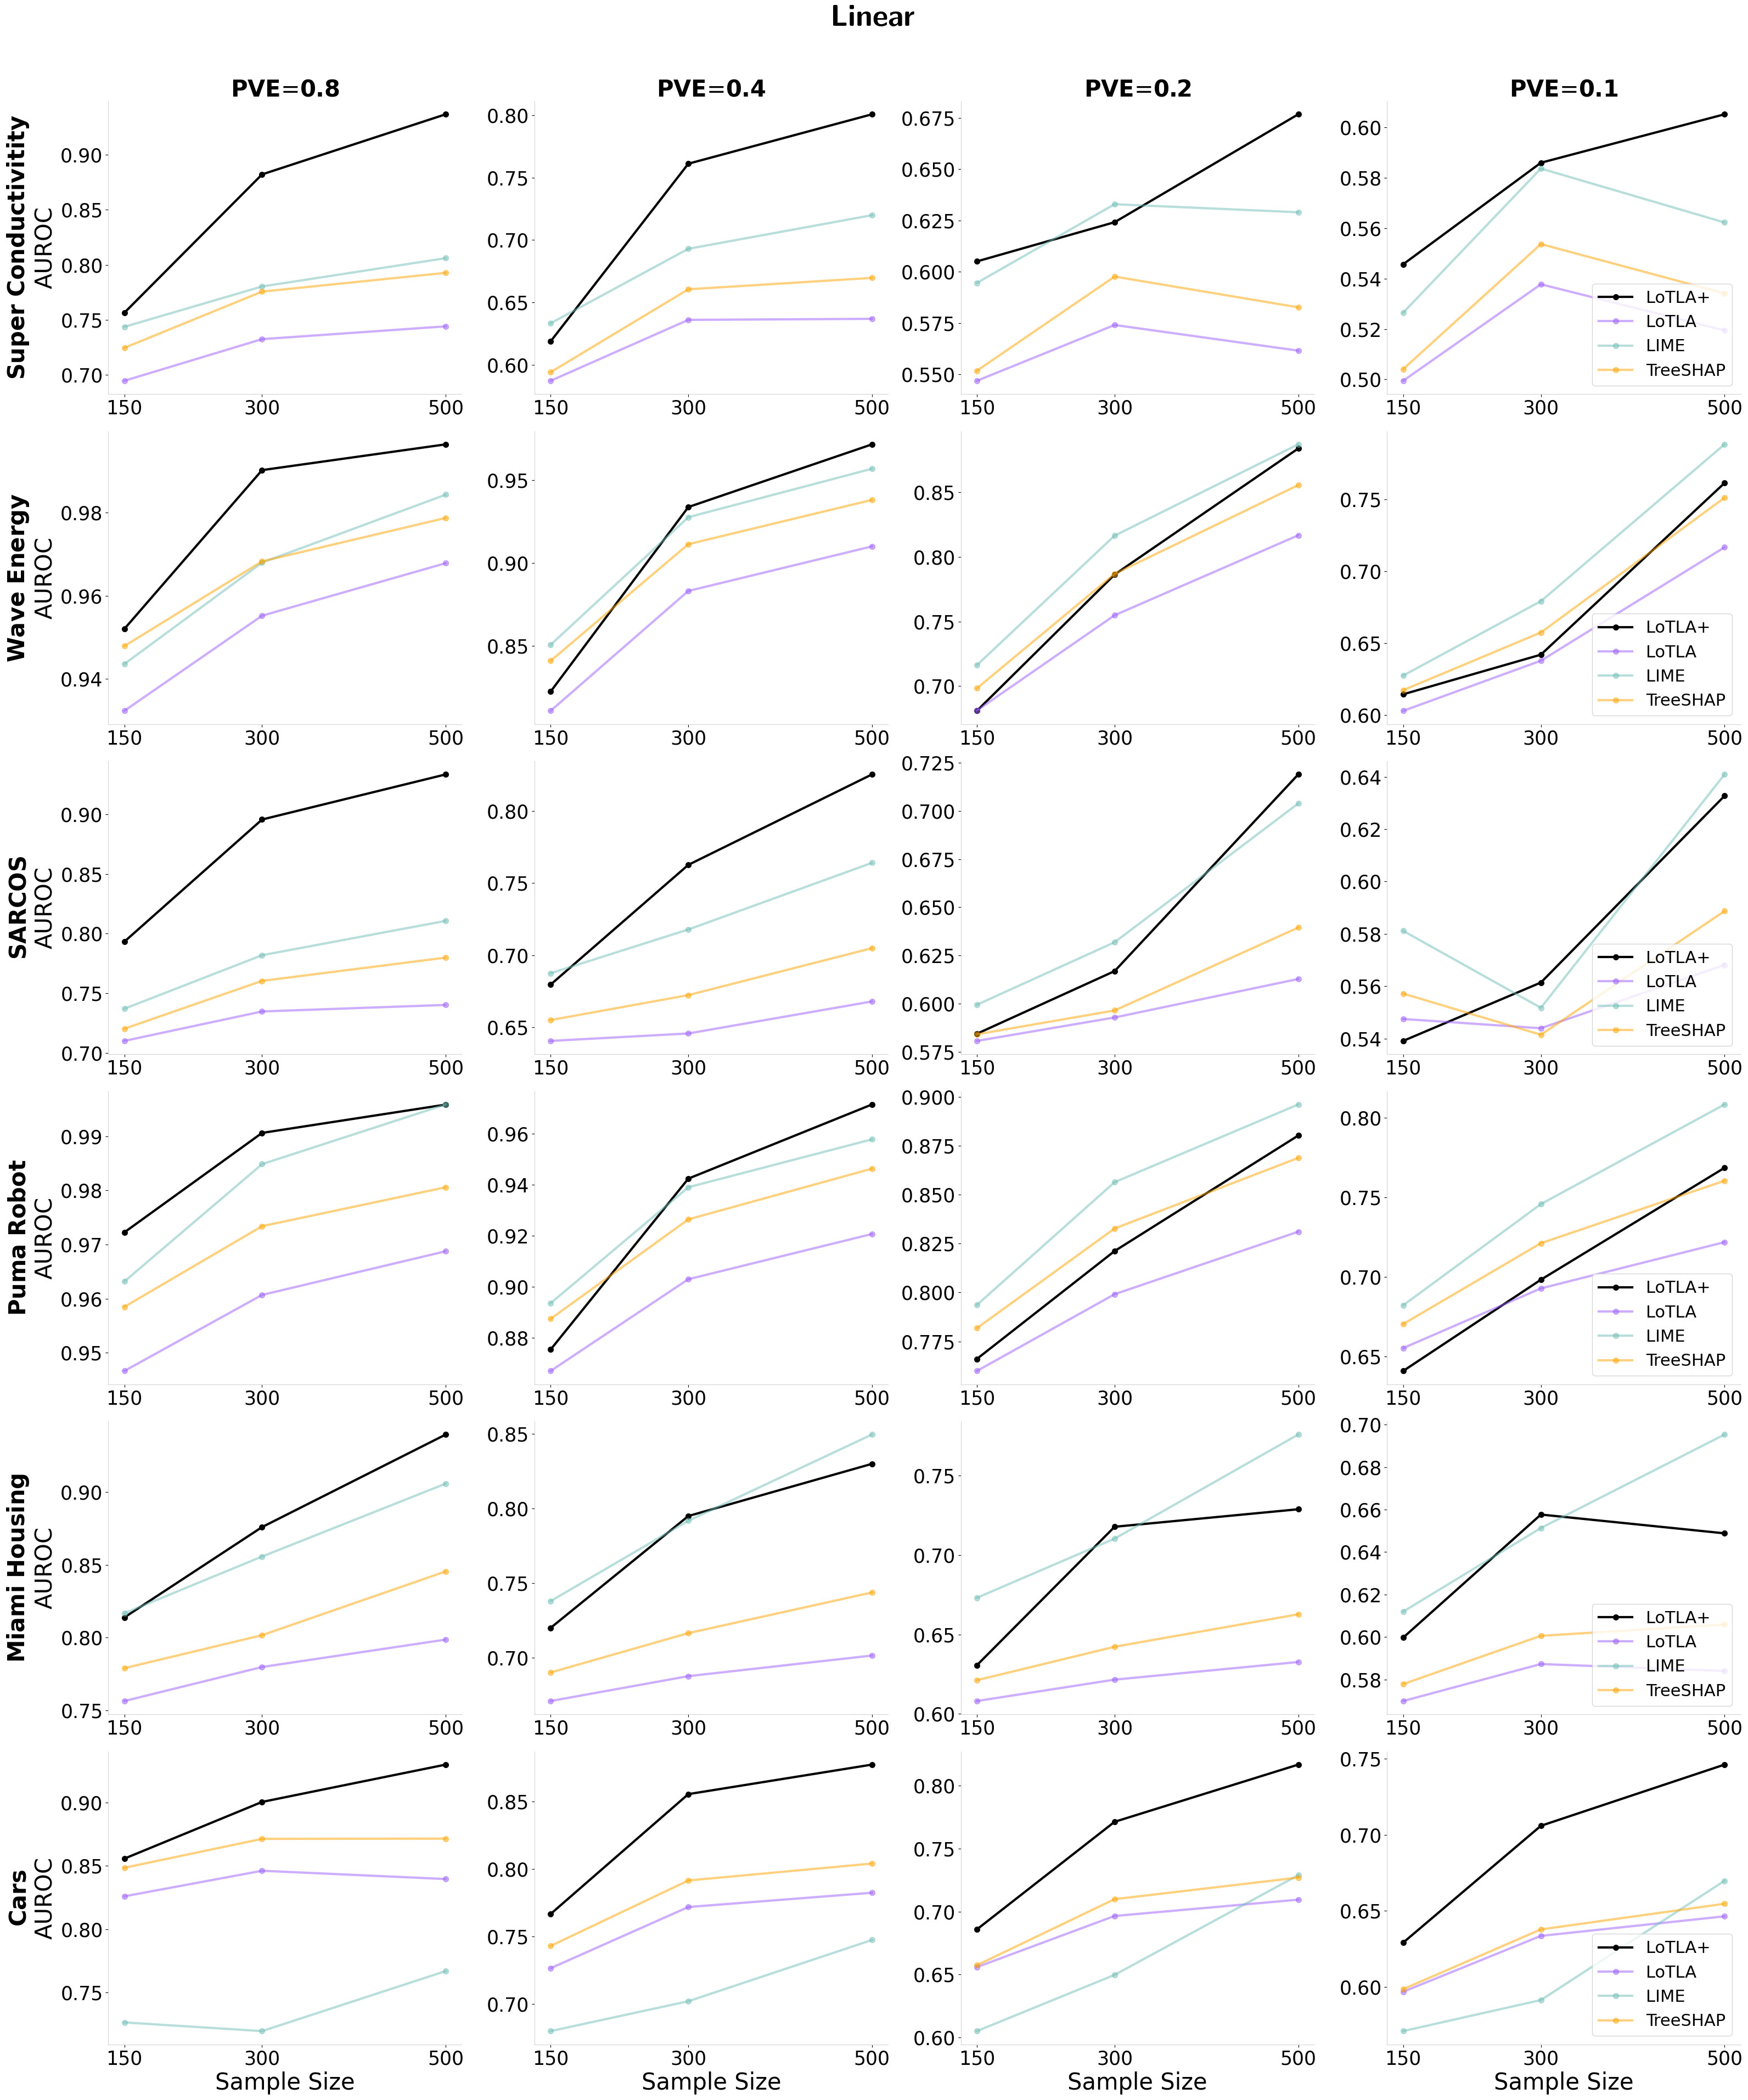

In [6]:
datasets = df["data"].unique()
heritability_all = df["heritability"].unique()[::-1]
marker_size = 7

# Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
n_cols = len(heritability_all)  # One column per PVE
n_rows = len(datasets)          # One row per dataset

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 6.5 * n_rows),
    sharey=False  # Share y-axis across columns for easier comparison
)

# Ensure axs is 2D for easy indexing
if n_rows == 1:
    axs = np.expand_dims(axs, axis=0)
if n_cols == 1:
    axs = np.expand_dims(axs, axis=1)

# Loop through each dataset (row) and PVE (column)
for row_idx, dataset in enumerate(datasets):
    for col_idx, heritability in enumerate(heritability_all):
        ax = axs[row_idx, col_idx]
        subset = df[(df["data"] == dataset) & (df["heritability"] == heritability)]
        
        # Plot results for each method
        for method in methods:
            method_data = subset[subset["fi"] == method]
            
            if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
                )
            else:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3
                )
        
        # Set x-axis labels and ticks
        ax.set_xticks([150, 300, 500])
        ax.set_xticklabels(["150", "300", "500"], fontsize=25)
        ax.tick_params(axis='y', labelsize=25)
        if row_idx == n_rows - 1:  # Label x-axis only for the last row
            ax.set_xlabel("Sample Size", fontsize=30)
        
        # Set y-axis labels only for the first column
        if col_idx == 0:
            dataset_label = data_name[dataset].replace(' ', r'\ ')
            ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\nAUROC", fontsize=30)
        else:
            ax.set_ylabel("")
        
        # set this for the first row
        if row_idx == 0:
            ax.set_title(r"$\bf{PVE}$=" + rf"$\bf{{{heritability}}}$", fontsize=30)

        # Add legend to the last subplot of the row
        if col_idx == n_cols - 1:
            ax.legend(fontsize=22, loc='lower right')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.suptitle(r"$\bf{Linear}$", fontsize=35)
plt.suptitle(r"\textbf{Linear}", fontsize=40, usetex=True)
plt.savefig("feature_ranking_linear_vary_sample_size_all.png")
plt.show()

In [7]:
# datasets = df["data"].unique()
# heritability = 0.1
# marker_size = 7

# # Determine number of rows and columns
# n_cols = 3
# n_rows = 2# len(datasets) // n_cols

# # Create subplots
# fig, axs = plt.subplots(
#     nrows=n_rows,
#     ncols=n_cols,
#     figsize=(8 * n_cols, 6 * n_rows),
#     sharey=False
# )

# # Flatten axes for easier indexing
# axs = axs.flatten()

# # Loop through each dataset
# for idx, dataset in enumerate(datasets):
#     ax = axs[idx]
#     subset = df[(df["data"] == dataset) & (df["heritability"] == heritability)]
    
#     # Plot results for each method
#     for method in methods:
#         method_data = subset[subset["fi"] == method]
        
#         if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
#             ax.plot(
#                 method_data["sample_row_n"], method_data['auroc_test'], 
#                 linestyle='solid',marker='o', markersize=marker_size,
#             label=methods_name[method], color=color_map[method],linewidth=3, alpha=0.5
#             )

#         else:
#             ax.plot(
#                 method_data["sample_row_n"], method_data['auroc_test'], linestyle='solid', marker='o',
#             label=methods_name[method], markersize=marker_size, color=color_map[method],linewidth=3
#             )

#     # Set x-axis and labels
#     ax.set_xticks([150, 300, 500])
#     ax.set_xticklabels(["150", "300", "500"], fontsize=15)
#     if idx >= (n_rows - 1) * n_cols:
#         ax.set_xlabel("Sample Size", fontsize=30)
    
#     # Only set y-axis label for the first plot in each row
#     if idx % n_cols == 0:
#         ax.set_ylabel(r"$\bf{Linear}$" + " "+ r"$\bf{PVE}$=" + rf"$\bf{{{heritability}}}$" + "\nAUROC", fontsize=30)
#     else:
#         ax.set_ylabel("")
    
#     # Set subplot title
#     ax.set_title(f"{data_name[dataset]}", fontsize=30)
    
#     # Add legend to the last plot in each row
#     if (idx + 1) % n_cols == 0 or idx == len(datasets) - 1:
#         ax.legend(fontsize=22, loc='lower right')

# # Adjust layout and show plot
# plt.tight_layout(rect=[0, 0, 1, 0.94])
# # Add a title at the top
# #plt.savefig("feature_ranking_regression_linear.png")
# plt.show()

In [8]:
dgp = "interaction"
combined_df = pd.DataFrame()
datasets = ["openml_361260", "openml_361622", "openml_361254",  "openml_361259", "openml_361253", "openml_361242"]
for data in datasets:
    ablation_directory = f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_{data}_{dgp}/{data}_{dgp}_vary_sample_size_gradient_boosting_large_depth/varying_heritability_sample_row_n"
    feature_seeds = [1,2,3,4,5]
    error_seed = 1
    sample_seeds = [1,2,3,4,5,6]
    for sample_seed in sample_seeds:
        for feature_seed in feature_seeds:
            df = pd.read_csv(os.path.join(ablation_directory, f"seed_{error_seed}_{feature_seed}_{sample_seed}/results.csv"))
            df["data"] = data
            combined_df = pd.concat([combined_df, df], ignore_index=True)
df = combined_df.groupby(['sample_row_n', 'heritability', 'fi', 'data'])[["auroc_train", "auroc_test"]].mean().reset_index()

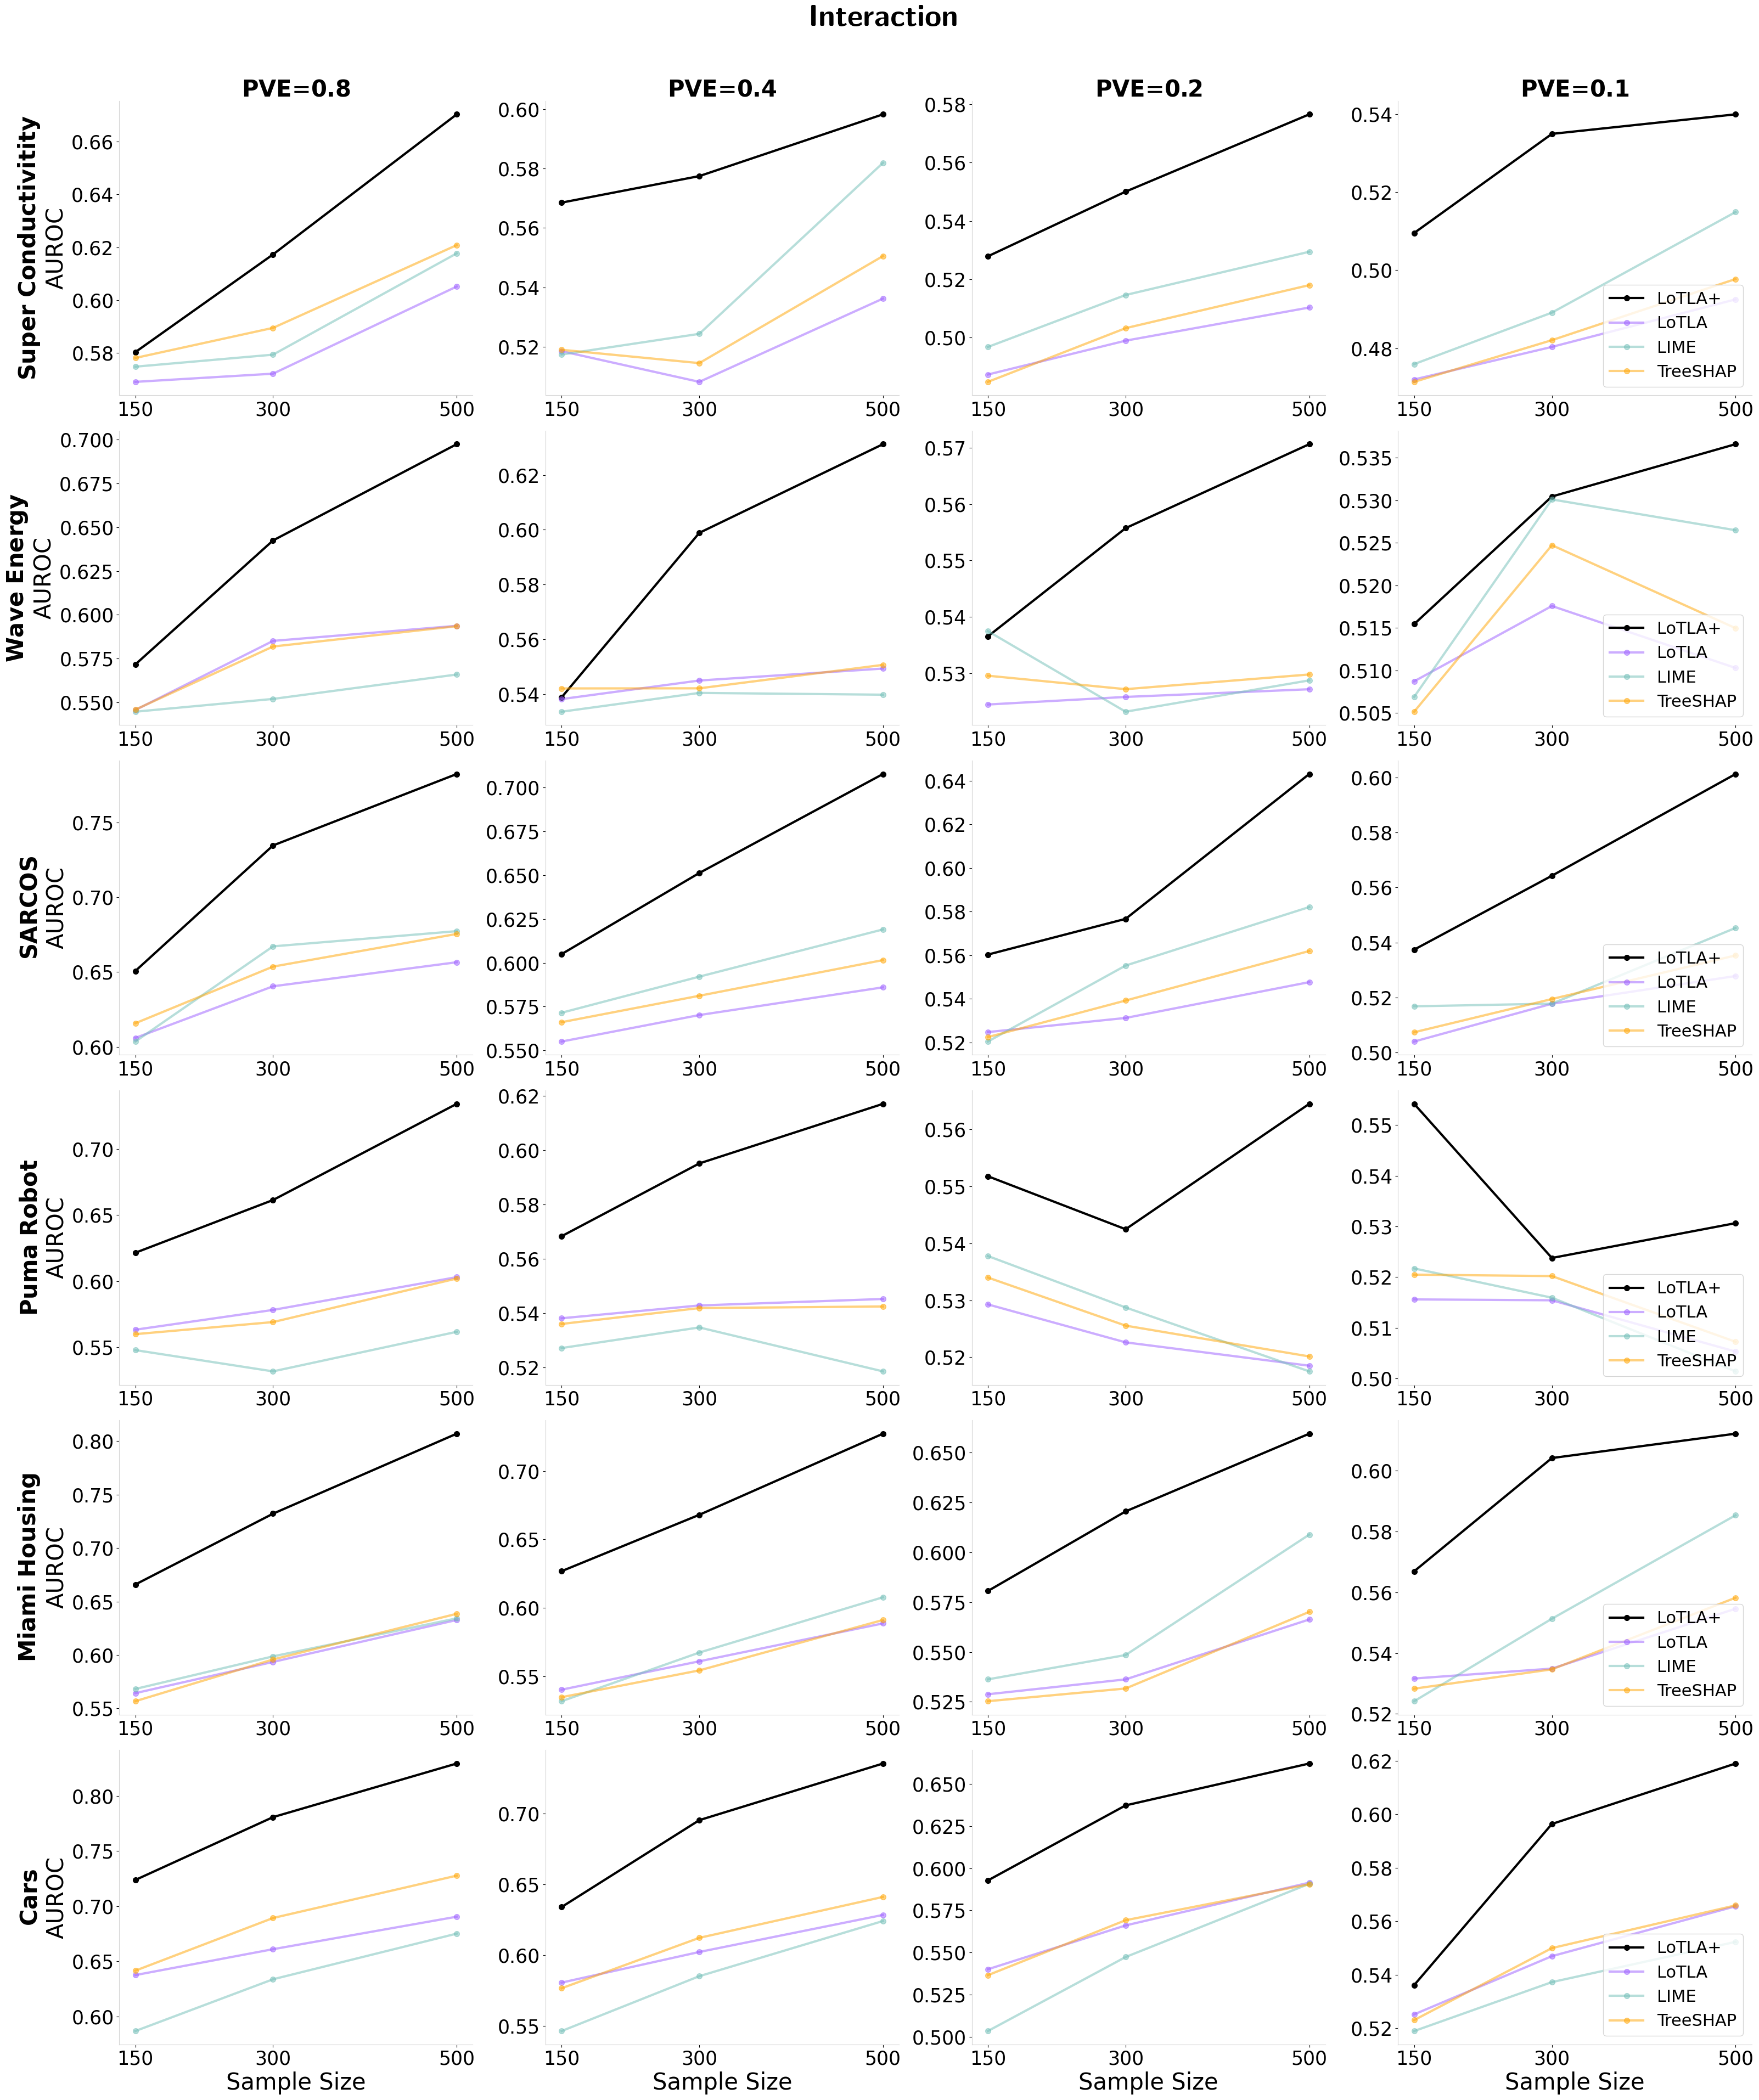

In [9]:
datasets = df["data"].unique()
heritability_all = df["heritability"].unique()[::-1]
marker_size = 7

# Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
n_cols = len(heritability_all)  # One column per PVE
n_rows = len(datasets)          # One row per dataset

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 6.5 * n_rows),
    sharey=False  # Share y-axis across columns for easier comparison
)

# Ensure axs is 2D for easy indexing
if n_rows == 1:
    axs = np.expand_dims(axs, axis=0)
if n_cols == 1:
    axs = np.expand_dims(axs, axis=1)

# Loop through each dataset (row) and PVE (column)
for row_idx, dataset in enumerate(datasets):
    for col_idx, heritability in enumerate(heritability_all):
        ax = axs[row_idx, col_idx]
        subset = df[(df["data"] == dataset) & (df["heritability"] == heritability)]
        
        # Plot results for each method
        for method in methods:
            method_data = subset[subset["fi"] == method]
            
            if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
                )
            else:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3
                )
        
        # Set x-axis labels and ticks
        ax.set_xticks([150, 300, 500])
        ax.set_xticklabels(["150", "300", "500"], fontsize=25)
        ax.tick_params(axis='y', labelsize=25)
        if row_idx == n_rows - 1:  # Label x-axis only for the last row
            ax.set_xlabel("Sample Size", fontsize=30)
        
        # Set y-axis labels only for the first column
        if col_idx == 0:
            dataset_label = data_name[dataset].replace(' ', r'\ ')
            ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\nAUROC", fontsize=30)
        else:
            ax.set_ylabel("")
        
        # set this for the first row
        if row_idx == 0:
            ax.set_title(r"$\bf{PVE}$=" + rf"$\bf{{{heritability}}}$", fontsize=30)

        # Add legend to the last subplot of the row
        if col_idx == n_cols - 1:
            ax.legend(fontsize=22, loc='lower right')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.suptitle(r"$\bf{Linear}$", fontsize=35)
plt.suptitle(r"\textbf{Interaction}", fontsize=40, usetex=True)
plt.savefig("feature_ranking_interaction_vary_sample_size_all.png")
plt.show()

In [10]:
# datasets = df["data"].unique()
# heritability = 0.8
# marker_size = 7

# # Determine number of rows and columns
# n_cols = 3
# n_rows = 2# len(datasets) // n_cols

# # Create subplots
# fig, axs = plt.subplots(
#     nrows=n_rows,
#     ncols=n_cols,
#     figsize=(8 * n_cols, 6 * n_rows),
#     sharey=False
# )

# # Flatten axes for easier indexing
# axs = axs.flatten()

# # Loop through each dataset
# for idx, dataset in enumerate(datasets):
#     ax = axs[idx]
#     subset = df[(df["data"] == dataset) & (df["heritability"] == heritability)]
    
#     # Plot results for each method
#     for method in methods:
#         method_data = subset[subset["fi"] == method]
        
#         if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
#             ax.plot(
#                 method_data["sample_row_n"], method_data['auroc_test'], 
#                 linestyle='solid',marker='o', markersize=marker_size,
#             label=methods_name[method], color=color_map[method],linewidth=3, alpha=0.5
#             )

#         else:
#             ax.plot(
#                 method_data["sample_row_n"], method_data['auroc_test'], linestyle='solid', marker='o',
#             label=methods_name[method], markersize=marker_size, color=color_map[method],linewidth=3
#             )

#     # Set x-axis and labels
#     ax.set_xticks([150, 300, 500])
#     ax.set_xticklabels(["150", "300", "500"], fontsize=15)
#     if idx >= (n_rows - 1) * n_cols:
#         ax.set_xlabel("Sample Size", fontsize=30)
    
#     # Only set y-axis label for the first plot in each row
#     if idx % n_cols == 0:
#         ax.set_ylabel(r"$\bf{Interaction}$" + " "+ r"$\bf{PVE}$=" + rf"$\bf{{{heritability}}}$" + "\nAUROC", fontsize=30)
#     else:
#         ax.set_ylabel("")
    
#     # Set subplot title
#     ax.set_title(f"{data_name[dataset]}", fontsize=30)
    
#     # Add legend to the last plot in each row
#     if (idx + 1) % n_cols == 0 or idx == len(datasets) - 1:
#         ax.legend(fontsize=22, loc='lower right')

# # Adjust layout and show plot
# plt.tight_layout(rect=[0, 0, 1, 0.94])
# # Add a title at the top
# #plt.savefig("feature_ranking_regression_interaction.png")
# plt.show()

In [11]:
dgp = "linear_lss"
combined_df = pd.DataFrame()
datasets = ["openml_361260", "openml_361622", "openml_361254",  "openml_361259", "openml_361253", "openml_361242"]
for data in datasets:
    ablation_directory = f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_{data}_{dgp}/{data}_{dgp}_vary_sample_size_gradient_boosting_large_depth/varying_heritability_sample_row_n"
    feature_seeds = [1,2,3,4,5]
    error_seed = 1
    sample_seeds = [1,2,3,4,5,6]
    for sample_seed in sample_seeds:
        for feature_seed in feature_seeds:
            df = pd.read_csv(os.path.join(ablation_directory, f"seed_{error_seed}_{feature_seed}_{sample_seed}/results.csv"))
            df["data"] = data
            combined_df = pd.concat([combined_df, df], ignore_index=True)
df = combined_df.groupby(['sample_row_n', 'heritability', 'fi', 'data'])[["auroc_train", "auroc_test"]].mean().reset_index()

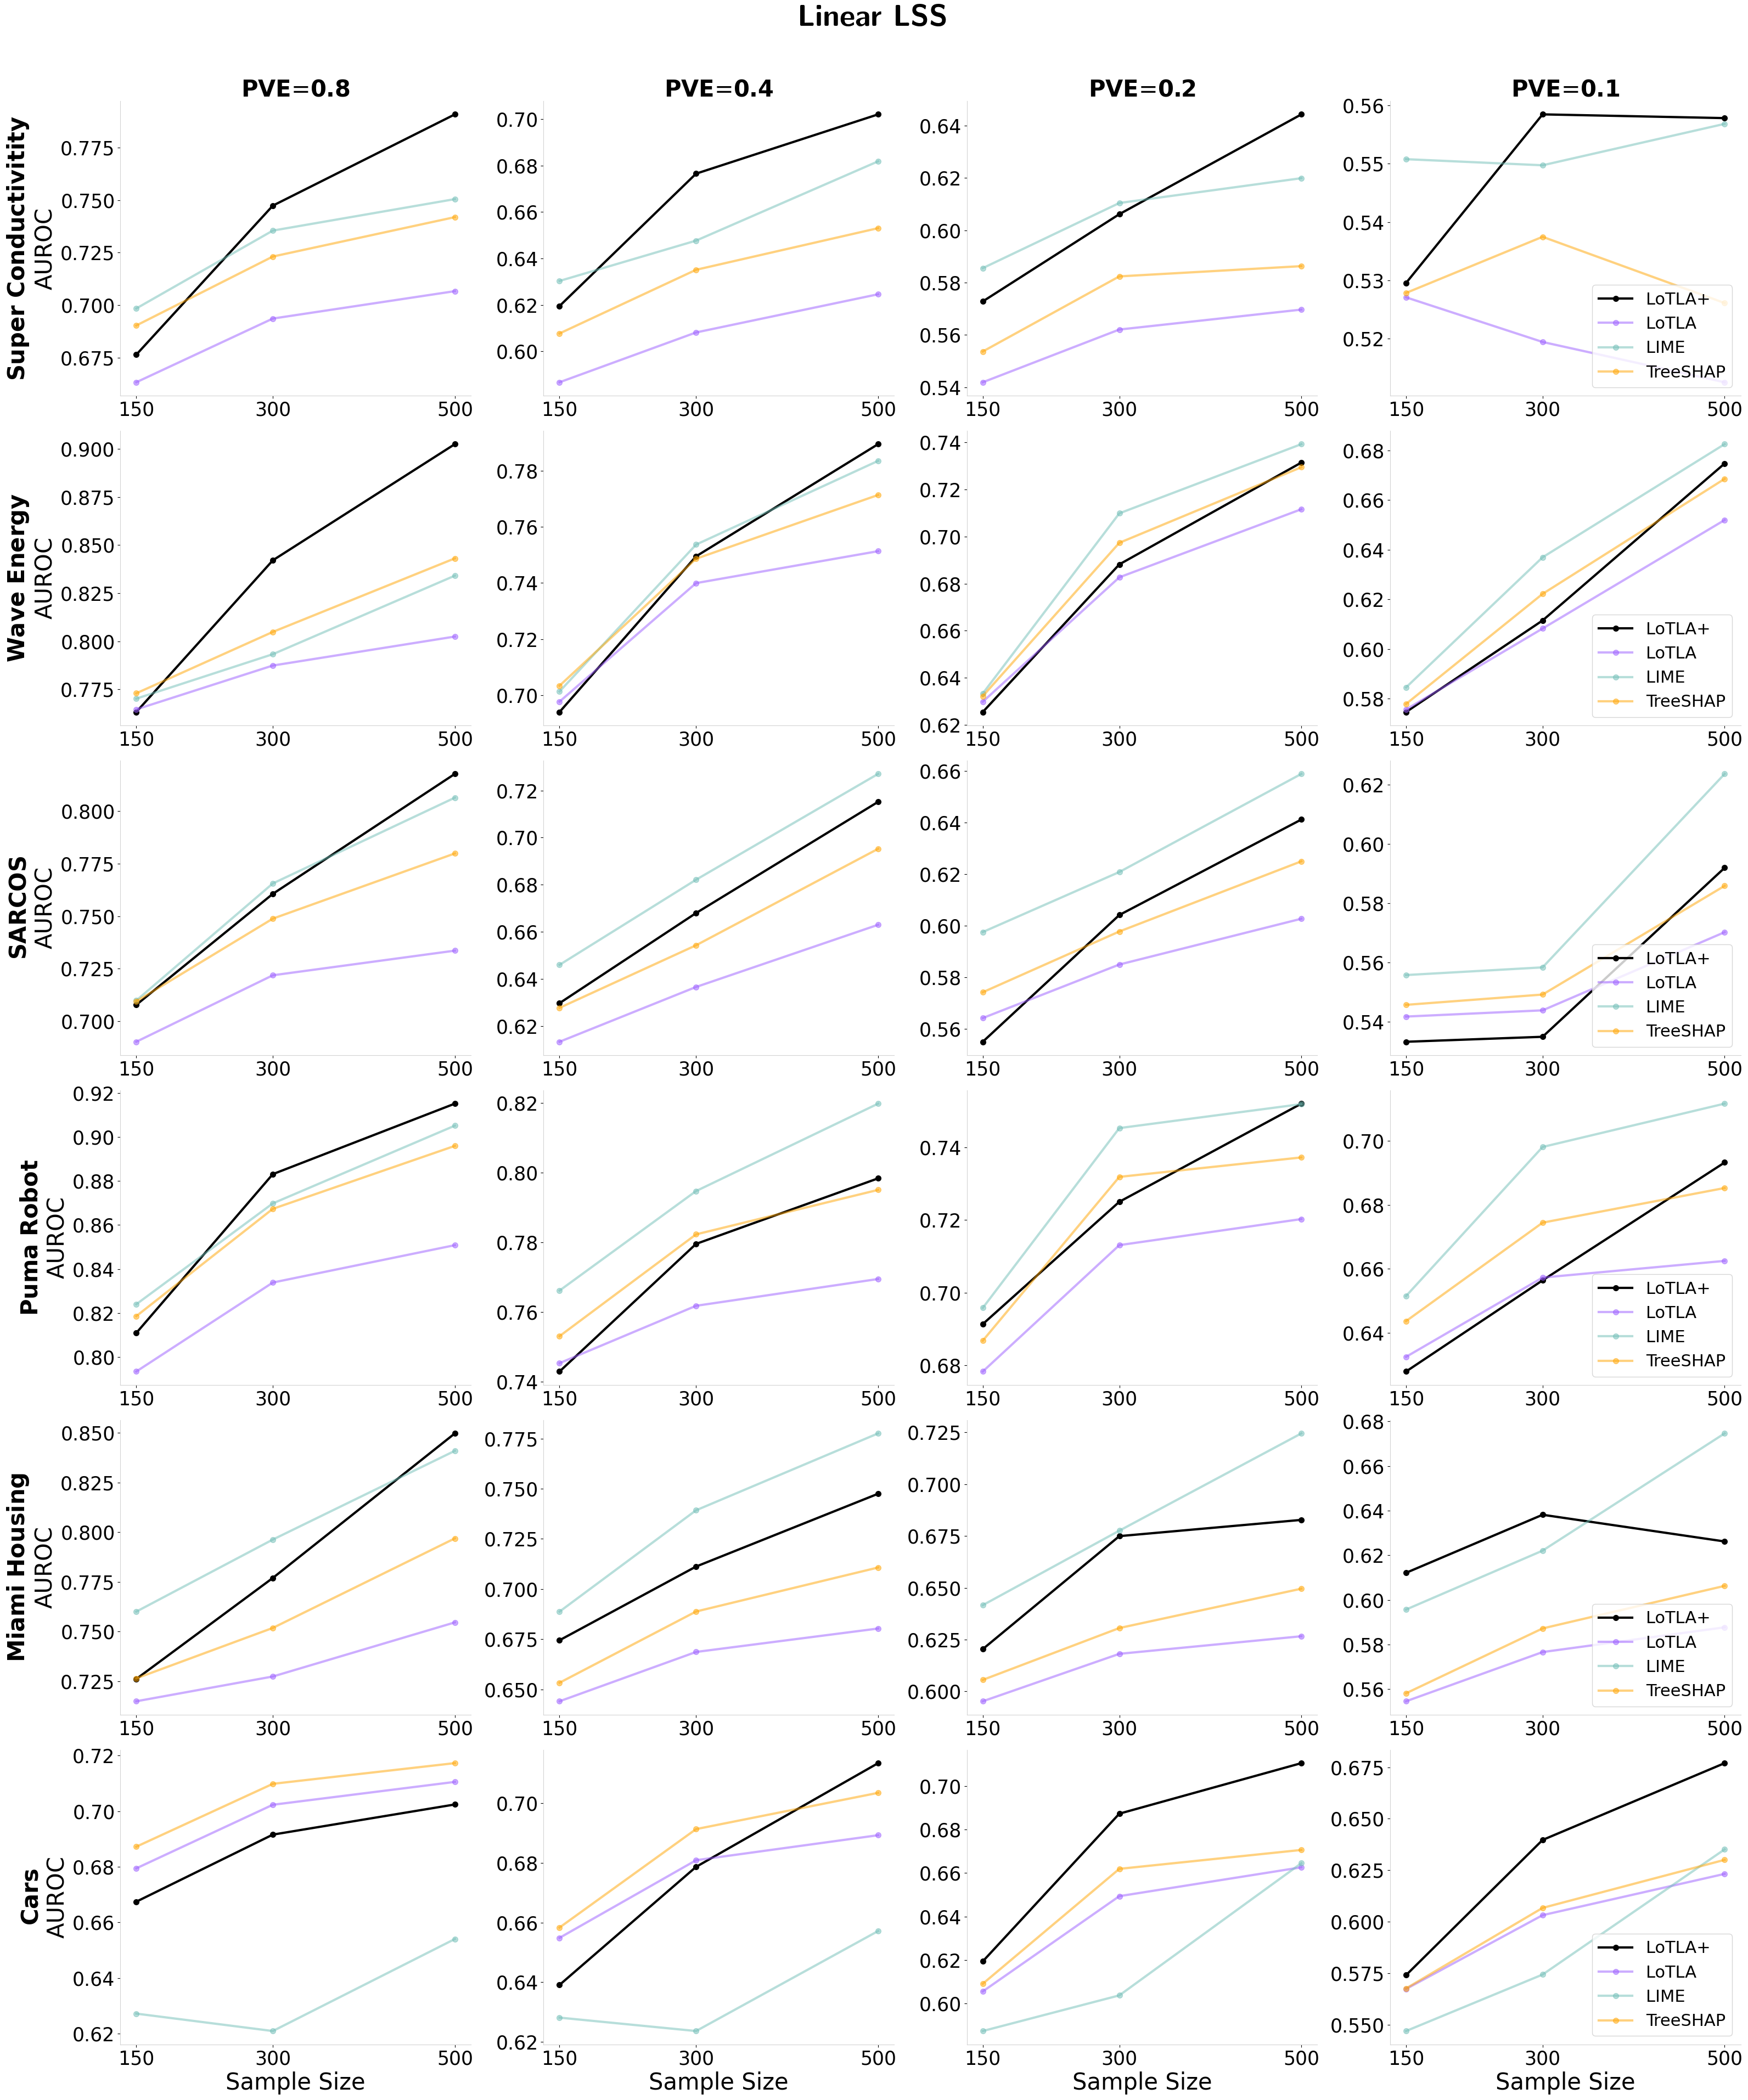

In [12]:
datasets = df["data"].unique()
heritability_all = df["heritability"].unique()[::-1]
marker_size = 7

# Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
n_cols = len(heritability_all)  # One column per PVE
n_rows = len(datasets)          # One row per dataset

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 6.5 * n_rows),
    sharey=False  # Share y-axis across columns for easier comparison
)

# Ensure axs is 2D for easy indexing
if n_rows == 1:
    axs = np.expand_dims(axs, axis=0)
if n_cols == 1:
    axs = np.expand_dims(axs, axis=1)

# Loop through each dataset (row) and PVE (column)
for row_idx, dataset in enumerate(datasets):
    for col_idx, heritability in enumerate(heritability_all):
        ax = axs[row_idx, col_idx]
        subset = df[(df["data"] == dataset) & (df["heritability"] == heritability)]
        
        # Plot results for each method
        for method in methods:
            method_data = subset[subset["fi"] == method]
            
            if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
                )
            else:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3
                )
        
        # Set x-axis labels and ticks
        ax.set_xticks([150, 300, 500])
        ax.set_xticklabels(["150", "300", "500"], fontsize=25)
        ax.tick_params(axis='y', labelsize=25)
        if row_idx == n_rows - 1:  # Label x-axis only for the last row
            ax.set_xlabel("Sample Size", fontsize=30)
        
        # Set y-axis labels only for the first column
        if col_idx == 0:
            dataset_label = data_name[dataset].replace(' ', r'\ ')
            ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\nAUROC", fontsize=30)
        else:
            ax.set_ylabel("")
        
        # set this for the first row
        if row_idx == 0:
            ax.set_title(r"$\bf{PVE}$=" + rf"$\bf{{{heritability}}}$", fontsize=30)

        # Add legend to the last subplot of the row
        if col_idx == n_cols - 1:
            ax.legend(fontsize=22, loc='lower right')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.suptitle(r"$\bf{Linear}$", fontsize=35)
plt.suptitle(r"\textbf{Linear LSS}", fontsize=40, usetex=True)
plt.savefig("feature_ranking_linear_lss_vary_sample_size_all.png")
plt.show()

In [13]:
# datasets = df["data"].unique()
# heritability = 0.8
# marker_size = 7

# # Determine number of rows and columns
# n_cols = 3
# n_rows = 2#len(datasets) // n_cols

# # Create subplots
# fig, axs = plt.subplots(
#     nrows=n_rows,
#     ncols=n_cols,
#     figsize=(8 * n_cols, 6 * n_rows),
#     sharey=False
# )

# # Flatten axes for easier indexing
# axs = axs.flatten()

# # Loop through each dataset
# for idx, dataset in enumerate(datasets):
#     ax = axs[idx]
#     subset = df[(df["data"] == dataset) & (df["heritability"] == heritability)]
    
#     # Plot results for each method
#     for method in methods:
#         method_data = subset[subset["fi"] == method]
        
#         if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
#             ax.plot(
#                 method_data["sample_row_n"], method_data['auroc_test'], 
#                 linestyle='solid',marker='o', markersize=marker_size,
#             label=methods_name[method], color=color_map[method],linewidth=3, alpha=0.5
#             )

#         else:
#             ax.plot(
#                 method_data["sample_row_n"], method_data['auroc_test'], linestyle='solid', marker='o',
#             label=methods_name[method], markersize=marker_size, color=color_map[method],linewidth=3
#             )

#     # Set x-axis and labels
#     ax.set_xticks([150, 300, 500])
#     ax.set_xticklabels(["150", "300", "500"], fontsize=15)
#     if idx >= (n_rows - 1) * n_cols:
#         ax.set_xlabel("Sample Size", fontsize=30)
    
#     # Only set y-axis label for the first plot in each row
#     if idx % n_cols == 0:
#         ax.set_ylabel(r"$\bf{Linear LSS}$" + " "+ r"$\bf{PVE}$=" + rf"$\bf{{{heritability}}}$" + "\nAUROC", fontsize=30)        
#     else:
#         ax.set_ylabel("")
    
#     # Set subplot title
#     ax.set_title(f"{data_name[dataset]}", fontsize=30)
    
#     # Add legend to the last plot in each row
#     if (idx + 1) % n_cols == 0 or idx == len(datasets) - 1:
#         ax.legend(fontsize=22, loc='lower right')

# # Adjust layout and show plot
# plt.tight_layout(rect=[0, 0, 1, 0.94])
# # Add a title at the top
# #plt.savefig("feature_ranking_regression_linear_lss.png")
# plt.show()

### Classification

In [14]:
dgp = "logistic_linear"
datasets = ["openml_146819", "openml_361070", "openml_361062","openml_9946","openml_9978"]#"openml_43",
combined_df = pd.DataFrame()
for data in datasets:
    ablation_directory = f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_classification_{data}_{dgp}/{data}_{dgp}_vary_sample_size_gradient_boosting_large_depth/varying_frac_label_corruption_sample_row_n"
    feature_seeds = [1,2,3,4,5]
    error_seed = 1
    sample_seeds = [1,2,3,4,5,6]
    for sample_seed in sample_seeds:
        for feature_seed in feature_seeds:
            try:
                df = pd.read_csv(os.path.join(ablation_directory, f"seed_{error_seed}_{feature_seed}_{sample_seed}/results.csv"))
                df["data"] = data
                combined_df = pd.concat([combined_df, df], ignore_index=True)
            except:
                pass
df = combined_df.groupby(['sample_row_n', 'frac_label_corruption', 'fi', 'data'])[["auroc_train", "auroc_test"]].mean().reset_index()

In [15]:
methods = [
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus',    
    'MDI',
    'LIME_RF',
    'TreeSHAP_RF',
]
color_map = {
    'LIME_RF': '#71BEB7',
    'TreeSHAP_RF': 'orange',
    'MDI': '#9B5DFF',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'black'
}

data_name = {
    "openml_43": "Spam",
    "openml_9946": "Breast Cancer",
    "openml_9978": "Ozone",
    "openml_146819": "Climate",
    "openml_361062": "Pol",
    "openml_361070": "Eye Movement"
}

methods_name = {
    'LIME_RF': 'LIME',
    'MDI': 'LoTLA',
    'TreeSHAP_RF': 'TreeSHAP',
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': 'LoTLA+',
}

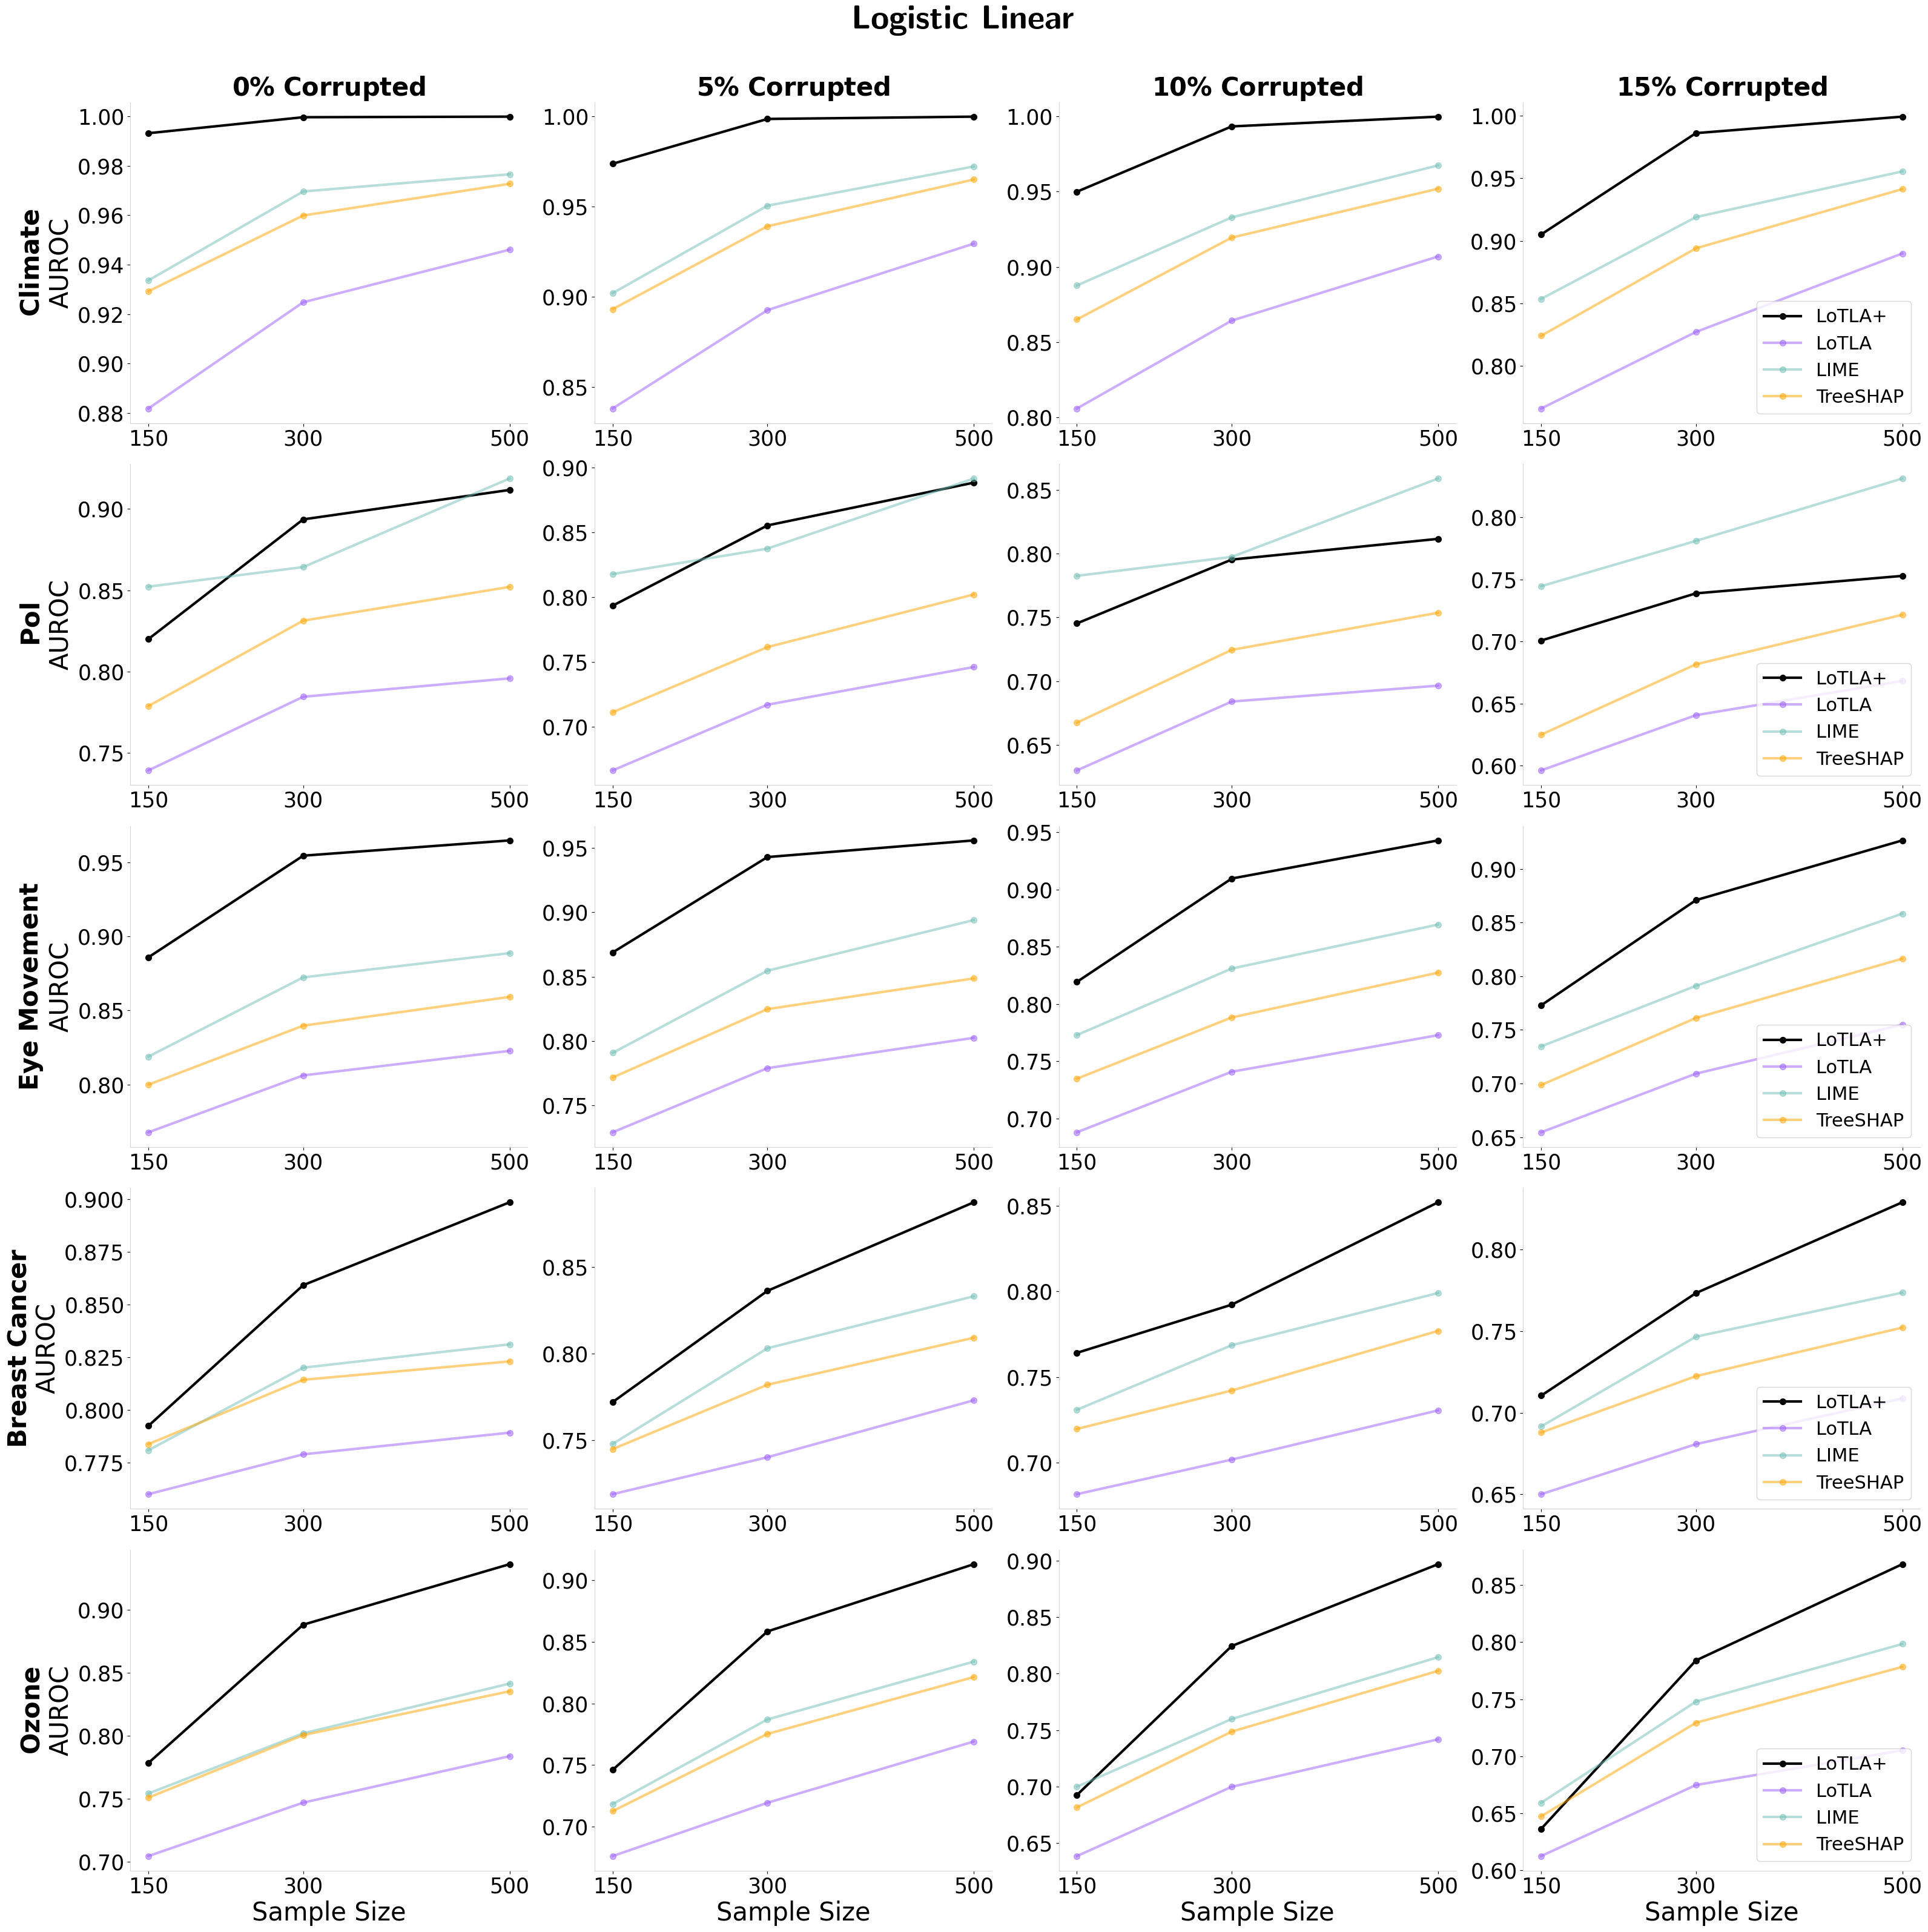

In [16]:
datasets = df["data"].unique()
frac_label_corruption_all = df["frac_label_corruption"].unique()
marker_size = 7

# Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
n_cols = len(heritability_all)  # One column per PVE
n_rows = len(datasets)          # One row per dataset

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 6.5 * n_rows),
    sharey=False  # Share y-axis across columns for easier comparison
)

# Ensure axs is 2D for easy indexing
if n_rows == 1:
    axs = np.expand_dims(axs, axis=0)
if n_cols == 1:
    axs = np.expand_dims(axs, axis=1)

# Loop through each dataset (row) and PVE (column)
for row_idx, dataset in enumerate(datasets):
    for col_idx, frac_label_corruption in enumerate(frac_label_corruption_all):
        ax = axs[row_idx, col_idx]
        subset = df[(df["data"] == dataset) & (df["frac_label_corruption"] == frac_label_corruption)]
        
        # Plot results for each method
        for method in methods:
            method_data = subset[subset["fi"] == method]
            
            if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
                )
            else:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3
                )
        
        # Set x-axis labels and ticks
        ax.set_xticks([150, 300, 500])
        ax.set_xticklabels(["150", "300", "500"], fontsize=25)
        ax.tick_params(axis='y', labelsize=25)
        if row_idx == n_rows - 1:  # Label x-axis only for the last row
            ax.set_xlabel("Sample Size", fontsize=30)
        
        # Set y-axis labels only for the first column
        if col_idx == 0:
            dataset_label = data_name[dataset].replace(' ', r'\ ')
            ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\nAUROC", fontsize=30)
        else:
            ax.set_ylabel("")
        
        # set this for the first row
        if row_idx == 0:
            ax.set_title(rf"$\bf{{{int(frac_label_corruption*100)}}} \% \ $" + r"$\bf{Corrupted}$", fontsize=30)

        # Add legend to the last subplot of the row
        if col_idx == n_cols - 1:
            ax.legend(fontsize=22, loc='lower right')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.suptitle(r"$\bf{Linear}$", fontsize=35)
plt.suptitle(r"\textbf{Logistic Linear}", fontsize=40, usetex=True)
plt.savefig("feature_ranking_logistic_linear_vary_sample_size_all.png")
plt.show()

In [17]:
# datasets = df["data"].unique()
# frac_label_corruption = 0
# marker_size = 7

# # Determine number of rows and columns
# n_cols = 3
# n_rows = 2#len(datasets) // n_cols

# # Create subplots
# fig, axs = plt.subplots(
#     nrows=n_rows,
#     ncols=n_cols,
#     figsize=(8 * n_cols, 6 * n_rows),
#     sharey=False
# )

# # Flatten axes for easier indexing
# axs = axs.flatten()

# # Loop through each dataset
# for idx, dataset in enumerate(datasets):
#     ax = axs[idx]
#     subset = df[(df["data"] == dataset) & (df["frac_label_corruption"] == frac_label_corruption)]
    
#     # Plot results for each method
#     for method in methods:
#         method_data = subset[subset["fi"] == method]

#         if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
#             ax.plot(
#                 method_data["sample_row_n"], method_data['auroc_test'], 
#                 linestyle='solid',marker='o', markersize=marker_size,
#             label=methods_name[method], color=color_map[method],linewidth=3, alpha=0.5
#             )

#         else:
#             ax.plot(
#                 method_data["sample_row_n"], method_data['auroc_test'], linestyle='solid', marker='o',
#             label=methods_name[method], markersize=marker_size, color=color_map[method],linewidth=3
#             )

#     # Set x-axis and labels
#     ax.set_xticks([150, 300, 500])
#     ax.set_xticklabels(["150", "300", "500"], fontsize=15)
#     if idx >= (n_rows - 1) * n_cols:
#         ax.set_xlabel("Sample Size", fontsize=30)
    
#     # Only set y-axis label for the first plot in each row
#     if idx % n_cols == 0:
#         ax.set_ylabel(r"$\bf{Logistic \ Linear}$"+"\nAUROC", fontsize=30)
#     else:
#         ax.set_ylabel("")
    
#     # Set subplot title
#     ax.set_title(f"{data_name[dataset]}", fontsize=30)
    
#     # # Add legend to the last plot in each row
#     if (idx + 1) % n_cols == 0 or idx == len(datasets) - 1:
#         ax.legend(fontsize=22, loc='lower right')

# # Adjust layout and show plot
# plt.tight_layout(rect=[0, 0, 1, 0.94])
# # Add a title at the top
# #plt.savefig("feature_ranking_classification_linear.png")
# plt.show()

In [18]:
dgp = "logistic_interaction"
datasets = ["openml_146819", "openml_361070", "openml_361062","openml_9946","openml_43","openml_9978"]
combined_df = pd.DataFrame()
for data in datasets:
    ablation_directory = f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_classification_{data}_{dgp}/{data}_{dgp}_vary_sample_size_gradient_boosting_large_depth/varying_frac_label_corruption_sample_row_n"
    feature_seeds = [1,2,3,4,5]
    error_seed = 1
    sample_seeds = [1,2,3,4,5,6]
    for sample_seed in sample_seeds:
        for feature_seed in feature_seeds:
            try:
                df = pd.read_csv(os.path.join(ablation_directory, f"seed_{error_seed}_{feature_seed}_{sample_seed}/results.csv"))
                df["data"] = data
                combined_df = pd.concat([combined_df, df], ignore_index=True)
            except:
                pass
df = combined_df.groupby(['sample_row_n', 'frac_label_corruption', 'fi', 'data'])[["auroc_train", "auroc_test"]].mean().reset_index()

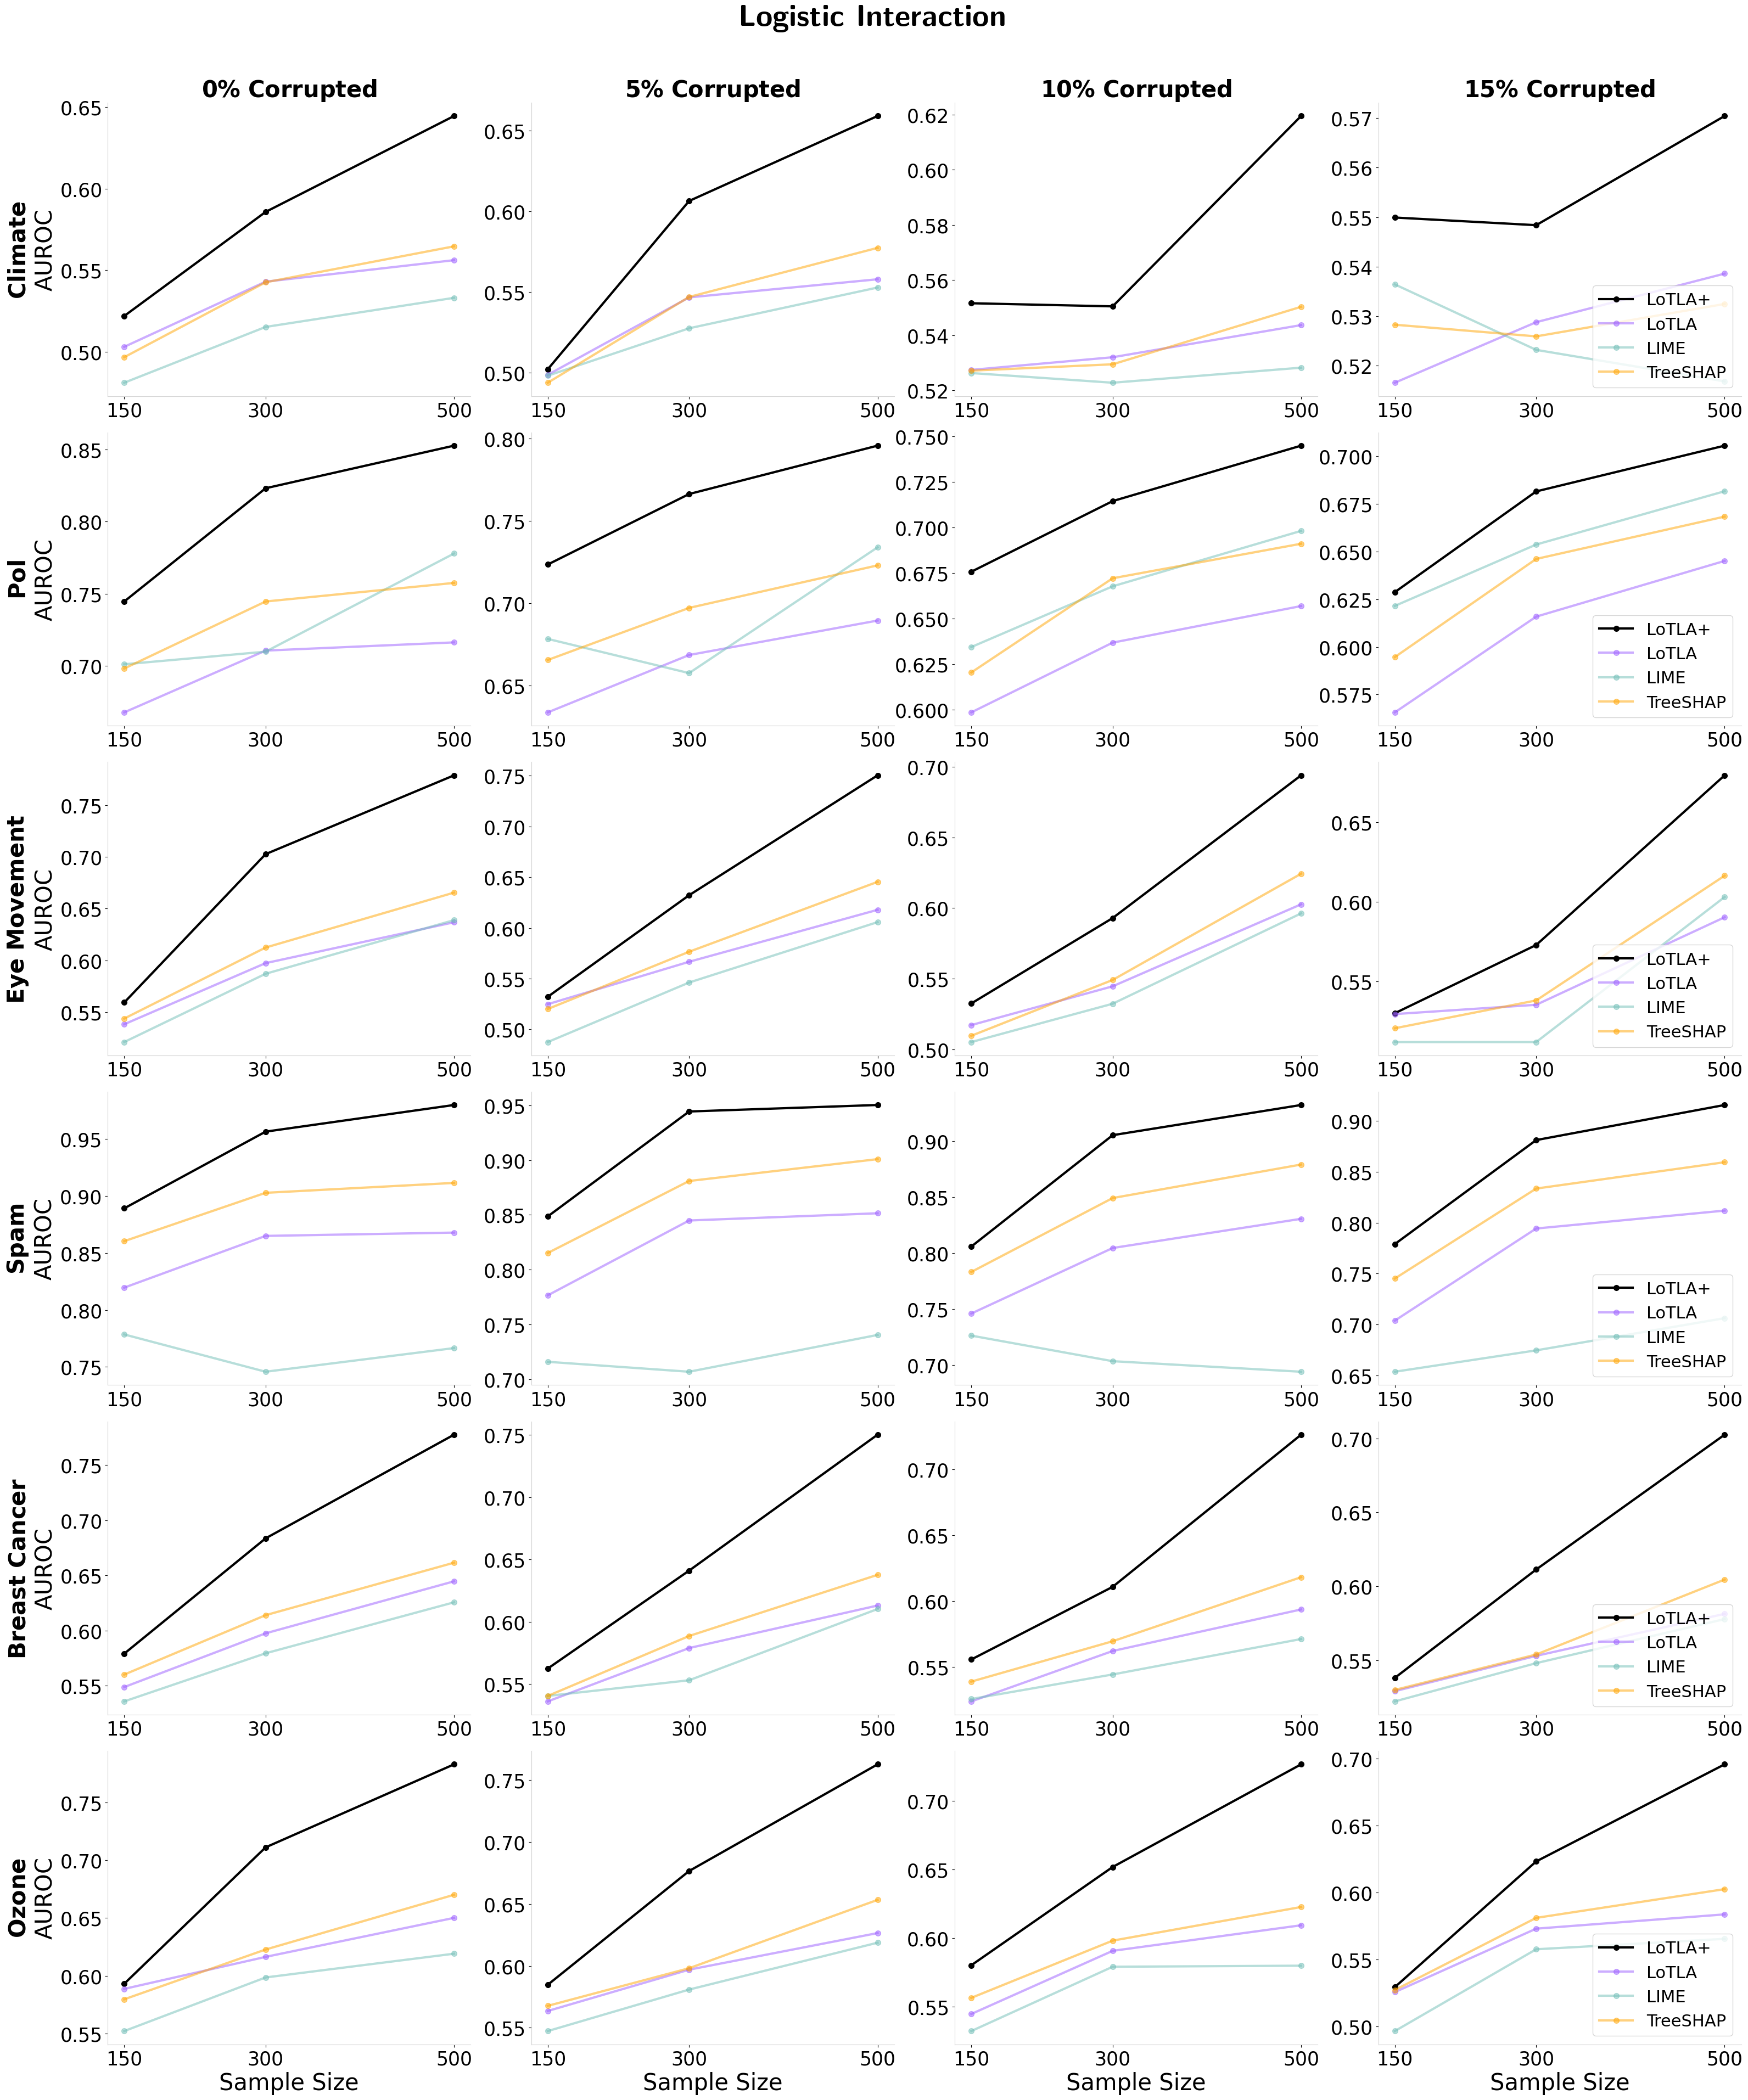

In [19]:
datasets = df["data"].unique()
frac_label_corruption_all = df["frac_label_corruption"].unique()
marker_size = 7

# Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
n_cols = len(heritability_all)  # One column per PVE
n_rows = len(datasets)          # One row per dataset

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 6.5 * n_rows),
    sharey=False  # Share y-axis across columns for easier comparison
)

# Ensure axs is 2D for easy indexing
if n_rows == 1:
    axs = np.expand_dims(axs, axis=0)
if n_cols == 1:
    axs = np.expand_dims(axs, axis=1)

# Loop through each dataset (row) and PVE (column)
for row_idx, dataset in enumerate(datasets):
    for col_idx, frac_label_corruption in enumerate(frac_label_corruption_all):
        ax = axs[row_idx, col_idx]
        subset = df[(df["data"] == dataset) & (df["frac_label_corruption"] == frac_label_corruption)]
        
        # Plot results for each method
        for method in methods:
            method_data = subset[subset["fi"] == method]
            
            if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
                )
            else:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3
                )
        
        # Set x-axis labels and ticks
        ax.set_xticks([150, 300, 500])
        ax.set_xticklabels(["150", "300", "500"], fontsize=25)
        ax.tick_params(axis='y', labelsize=25)
        if row_idx == n_rows - 1:  # Label x-axis only for the last row
            ax.set_xlabel("Sample Size", fontsize=30)
        
        # Set y-axis labels only for the first column
        if col_idx == 0:
            dataset_label = data_name[dataset].replace(' ', r'\ ')
            ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\nAUROC", fontsize=30)
        else:
            ax.set_ylabel("")
        
        # set this for the first row
        if row_idx == 0:
            ax.set_title(rf"$\bf{{{int(frac_label_corruption*100)}}} \% \ $" + r"$\bf{Corrupted}$", fontsize=30)

        # Add legend to the last subplot of the row
        if col_idx == n_cols - 1:
            ax.legend(fontsize=22, loc='lower right')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.suptitle(r"$\bf{Linear}$", fontsize=35)
plt.suptitle(r"\textbf{Logistic Interaction}", fontsize=40, usetex=True)
plt.savefig("feature_ranking_logistic_interaction_vary_sample_size_all.png")
plt.show()

In [20]:
# datasets = df["data"].unique()
# frac_label_corruption = 0
# marker_size = 7

# # Determine number of rows and columns
# n_cols = 3
# n_rows = 2#len(datasets) // n_cols

# # Create subplots
# fig, axs = plt.subplots(
#     nrows=n_rows,
#     ncols=n_cols,
#     figsize=(8 * n_cols, 6 * n_rows),
#     sharey=False
# )

# # Flatten axes for easier indexing
# axs = axs.flatten()

# # Loop through each dataset
# for idx, dataset in enumerate(datasets):
#     ax = axs[idx]
#     subset = df[(df["data"] == dataset) & (df["frac_label_corruption"] == frac_label_corruption)]
    
#     # Plot results for each method
#     for method in methods:
#         method_data = subset[subset["fi"] == method]

#         if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
#             ax.plot(
#                 method_data["sample_row_n"], method_data['auroc_test'], 
#                 linestyle='solid',marker='o', markersize=marker_size,
#             label=methods_name[method], color=color_map[method],linewidth=3, alpha=0.5
#             )

#         else:
#             ax.plot(
#                 method_data["sample_row_n"], method_data['auroc_test'], linestyle='solid', marker='o',
#             label=methods_name[method], markersize=marker_size, color=color_map[method],linewidth=3
#             )
            
#     # Set x-axis and labels
#     ax.set_xticks([150, 300, 500])
#     ax.set_xticklabels(["150", "300", "500"], fontsize=15)
#     if idx >= (n_rows - 1) * n_cols:
#         ax.set_xlabel("Sample Size", fontsize=30)
    
#     # Only set y-axis label for the first plot in each row
#     if idx % n_cols == 0:
#         ax.set_ylabel(r"$\bf{Logistic \ Interaction}$"+"\nAUROC", fontsize=30)
#     else:
#         ax.set_ylabel("")
    
#     # Set subplot title
#     ax.set_title(f"{data_name[dataset]}", fontsize=30)
    
#     # Add legend to the last plot in each row
#     if (idx + 1) % n_cols == 0 or idx == len(datasets) - 1:
#         ax.legend(fontsize=22, loc='lower right')

# # Adjust layout and show plot
# plt.tight_layout(rect=[0, 0, 1, 0.94])
# # Add a title at the top
# #plt.savefig("feature_ranking_classification_interaction.png")
# plt.show()

In [21]:
dgp = "logistic_linear_lss"
datasets = ["openml_43","openml_146819", "openml_361070", "openml_361062","openml_9946","openml_9978"] #"openml_43",
combined_df = pd.DataFrame()
for data in datasets:
    ablation_directory = f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_classification_{data}_{dgp}/{data}_{dgp}_vary_sample_size_gradient_boosting_large_depth/varying_frac_label_corruption_sample_row_n"
    feature_seeds = [1,2,3,4,5]
    error_seed = 1
    sample_seeds = [1,2,3,4,5,6]
    for sample_seed in sample_seeds:
        for feature_seed in feature_seeds:
            try:
                df = pd.read_csv(os.path.join(ablation_directory, f"seed_{error_seed}_{feature_seed}_{sample_seed}/results.csv"))
                df["data"] = data
                combined_df = pd.concat([combined_df, df], ignore_index=True)
            except:
                pass
df = combined_df.groupby(['sample_row_n', 'frac_label_corruption', 'fi', 'data'])[["auroc_train", "auroc_test"]].mean().reset_index()

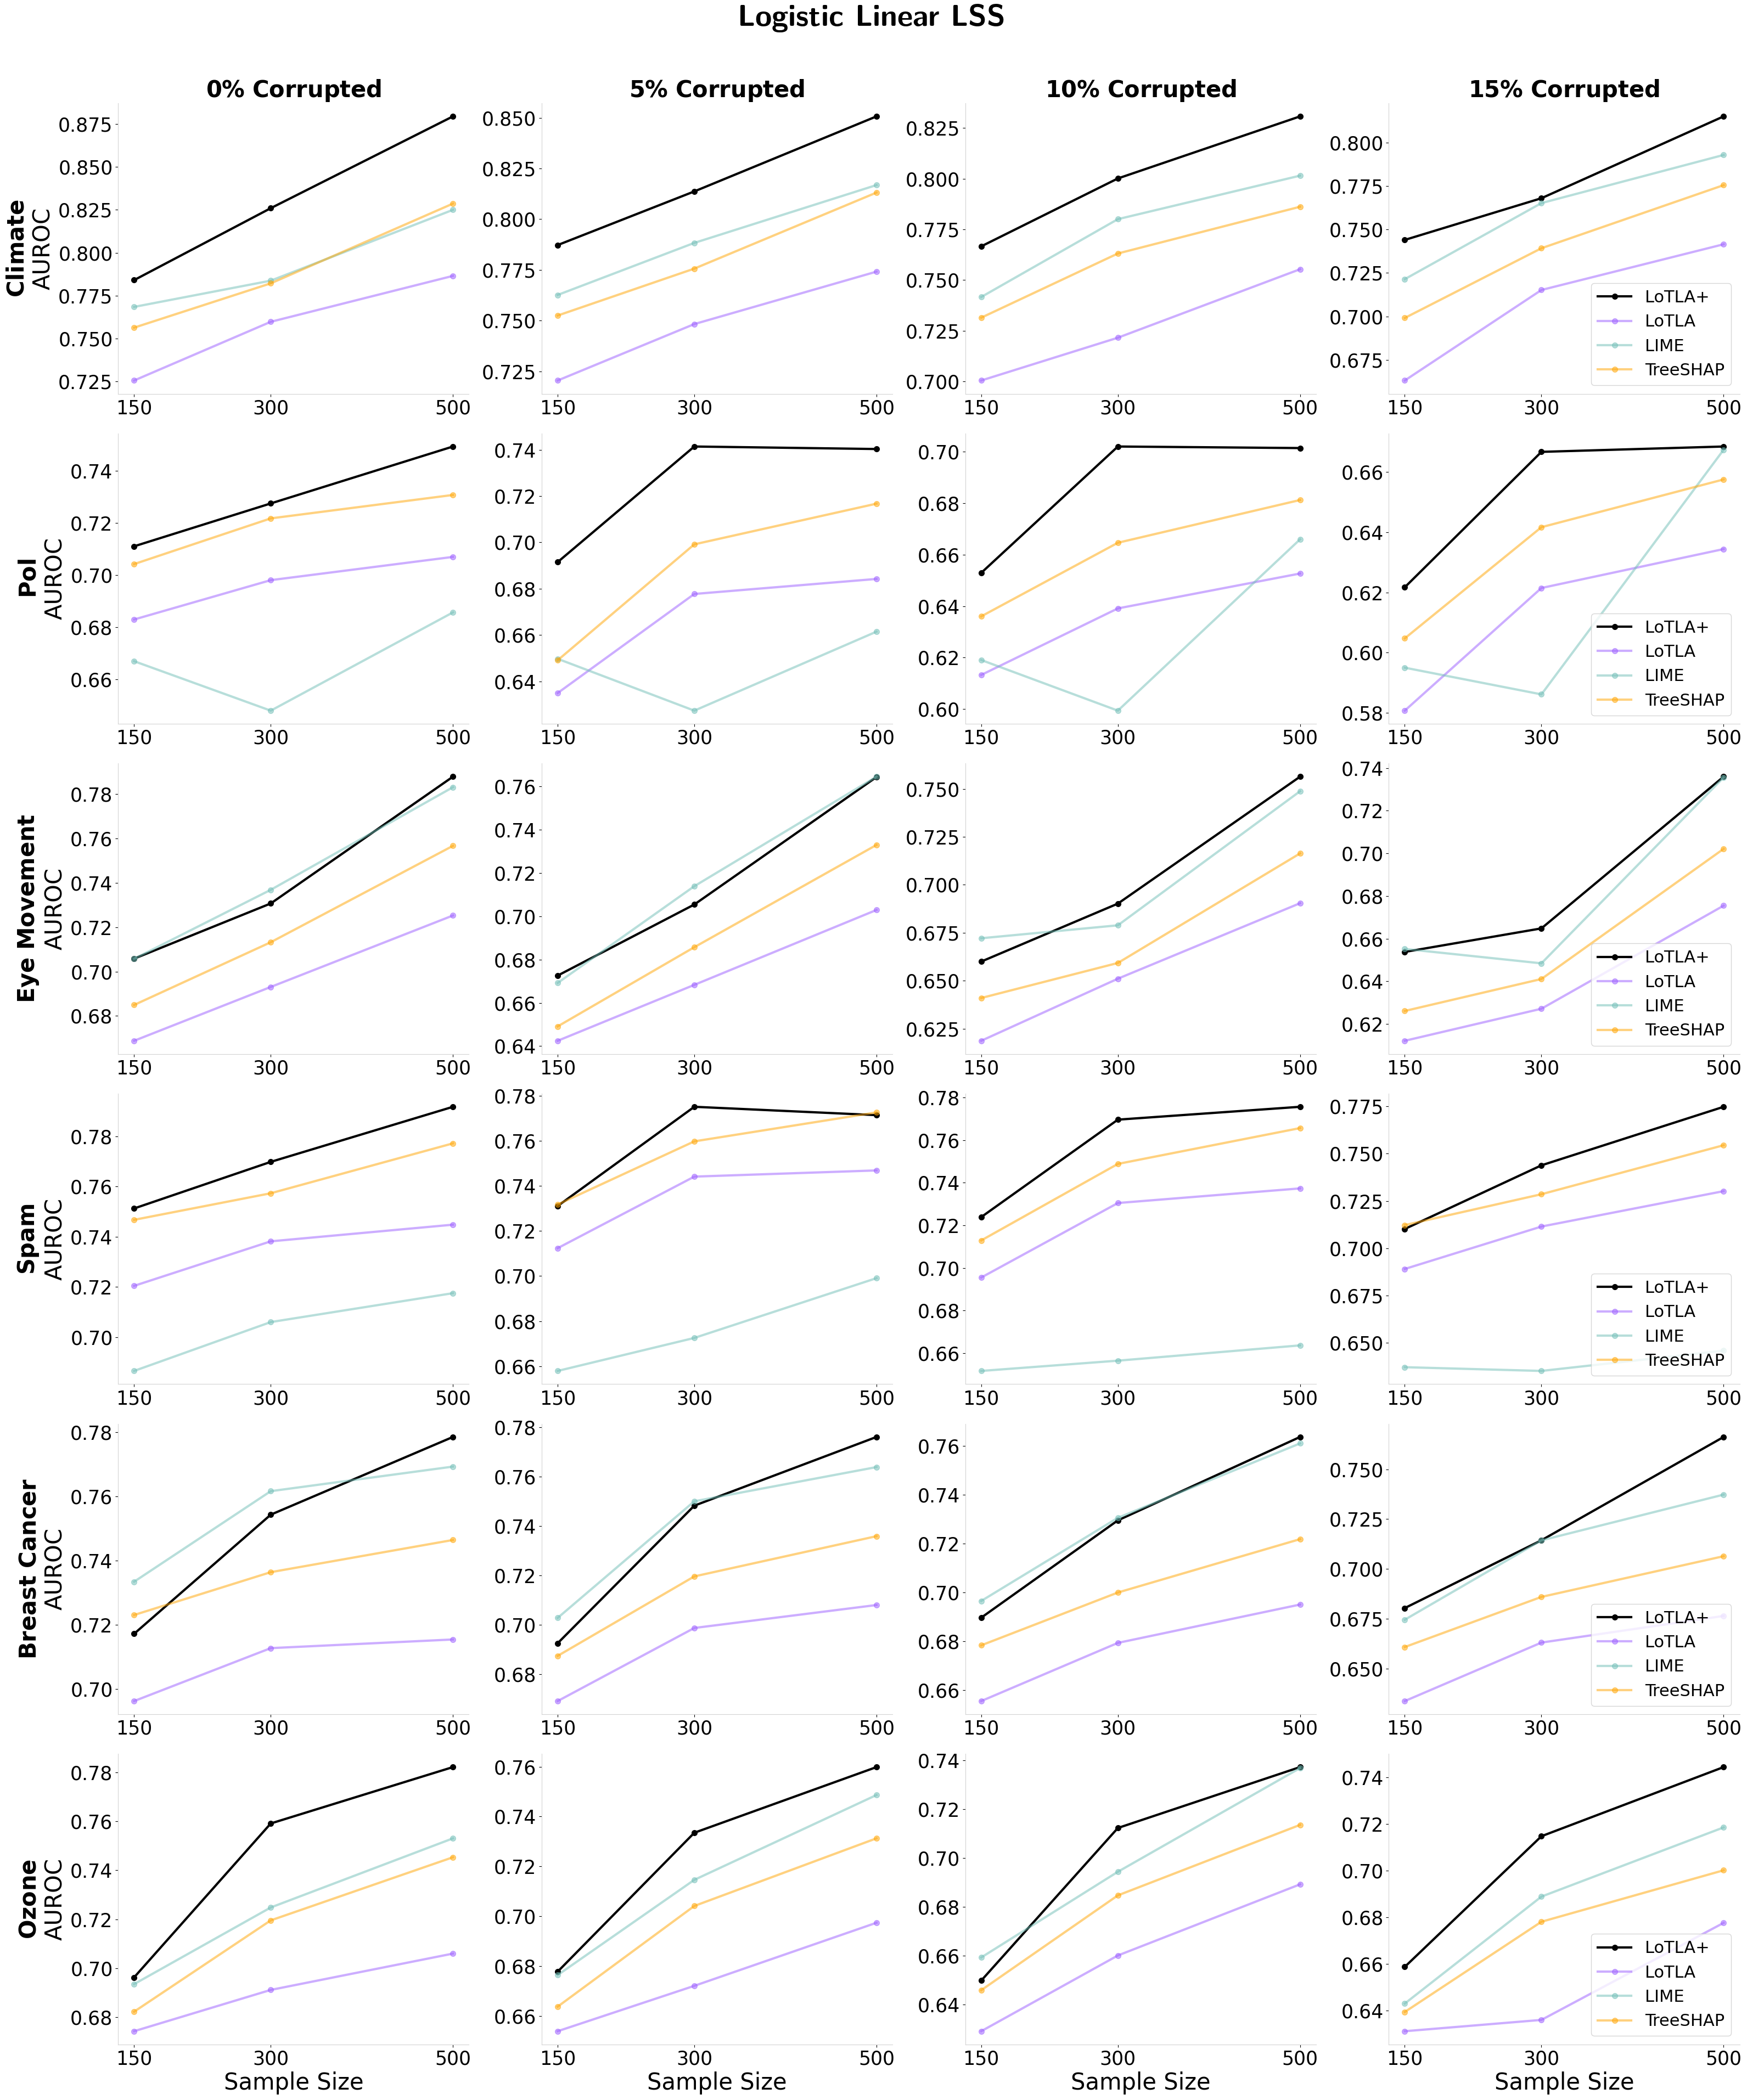

In [22]:
datasets = df["data"].unique()
frac_label_corruption_all = df["frac_label_corruption"].unique()
marker_size = 7

# Number of columns is fixed (4 for PVE), number of rows is based on the number of datasets
n_cols = len(heritability_all)  # One column per PVE
n_rows = len(datasets)          # One row per dataset

# Create subplots
fig, axs = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(8 * n_cols, 6.5 * n_rows),
    sharey=False  # Share y-axis across columns for easier comparison
)

# Ensure axs is 2D for easy indexing
if n_rows == 1:
    axs = np.expand_dims(axs, axis=0)
if n_cols == 1:
    axs = np.expand_dims(axs, axis=1)

# Loop through each dataset (row) and PVE (column)
for row_idx, dataset in enumerate(datasets):
    for col_idx, frac_label_corruption in enumerate(frac_label_corruption_all):
        ax = axs[row_idx, col_idx]
        subset = df[(df["data"] == dataset) & (df["frac_label_corruption"] == frac_label_corruption)]
        
        # Plot results for each method
        for method in methods:
            method_data = subset[subset["fi"] == method]
            
            if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3, alpha=0.5
                )
            else:
                ax.plot(
                    method_data["sample_row_n"], method_data['auroc_test'], 
                    linestyle='solid', marker='o', markersize=marker_size,
                    label=methods_name[method], color=color_map[method], linewidth=3
                )
        
        # Set x-axis labels and ticks
        ax.set_xticks([150, 300, 500])
        ax.set_xticklabels(["150", "300", "500"], fontsize=25)
        ax.tick_params(axis='y', labelsize=25)
        if row_idx == n_rows - 1:  # Label x-axis only for the last row
            ax.set_xlabel("Sample Size", fontsize=30)
        
        # Set y-axis labels only for the first column
        if col_idx == 0:
            dataset_label = data_name[dataset].replace(' ', r'\ ')
            ax.set_ylabel(f"$\\mathbf{{{dataset_label}}}$\nAUROC", fontsize=30)
        else:
            ax.set_ylabel("")
        
        # set this for the first row
        if row_idx == 0:
            ax.set_title(rf"$\bf{{{int(frac_label_corruption*100)}}} \% \ $" + r"$\bf{Corrupted}$", fontsize=30)

        # Add legend to the last subplot of the row
        if col_idx == n_cols - 1:
            ax.legend(fontsize=22, loc='lower right')

# Adjust layout and spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
# plt.suptitle(r"$\bf{Linear}$", fontsize=35)
plt.suptitle(r"\textbf{Logistic Linear LSS}", fontsize=40, usetex=True)
plt.savefig("feature_ranking_logistic_linear_lss_vary_sample_size_all.png")
plt.show()

In [23]:
# datasets = df["data"].unique()
# frac_label_corruption = 0
# marker_size = 7

# # Determine number of rows and columns
# n_cols = 3
# n_rows = 2#len(datasets) // n_cols

# # Create subplots
# fig, axs = plt.subplots(
#     nrows=n_rows,
#     ncols=n_cols,
#     figsize=(8 * n_cols, 6 * n_rows),
#     sharey=False
# )

# # Flatten axes for easier indexing
# axs = axs.flatten()

# # Loop through each dataset
# for idx, dataset in enumerate(datasets):
#     ax = axs[idx]
#     subset = df[(df["data"] == dataset) & (df["frac_label_corruption"] == frac_label_corruption)]
    
#     # Plot results for each method
#     for method in methods:
#         method_data = subset[subset["fi"] == method]

#         if method in ['LIME_RF', 'TreeSHAP_RF', 'MDI']:
#             ax.plot(
#                 method_data["sample_row_n"], method_data['auroc_test'], 
#                 linestyle='solid',marker='o', markersize=marker_size,
#             label=methods_name[method], color=color_map[method],linewidth=3, alpha=0.5
#             )

#         else:
#             ax.plot(
#                 method_data["sample_row_n"], method_data['auroc_test'], linestyle='solid', marker='o',
#             label=methods_name[method], markersize=marker_size, color=color_map[method],linewidth=3
#             )

#     # Set x-axis and labels
#     ax.set_xticks([150, 300, 500])
#     ax.set_xticklabels(["150", "300", "500"], fontsize=15)
#     if idx >= (n_rows - 1) * n_cols:
#         ax.set_xlabel("Sample Size", fontsize=30)
    
#     # Only set y-axis label for the first plot in each row
#     if idx % n_cols == 0:
#         ax.set_ylabel(r"$\bf{Logistic \ Linear LSS}$"+"\nAUROC", fontsize=30)
#     else:
#         ax.set_ylabel("")
    
#     # Set subplot title
#     ax.set_title(f"{data_name[dataset]}", fontsize=30)
    
#     # Add legend to the last plot in each row
#     if (idx + 1) % n_cols == 0 or idx == len(datasets) - 1:
#         ax.legend(fontsize=22, loc='lower right')

# # Adjust layout and show plot
# plt.tight_layout(rect=[0, 0, 1, 0.94])
# # Add a title at the top
# #plt.savefig("feature_ranking_classification_linear_lss.png")
# plt.show()